## Assignment 3 
## Supervised Machine Learning
## Felix Cazarez

# Chapter 5: Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [3]:
# Importing packages
# for operations with dataframes
from matplotlib import pyplot as plt
# for operations with arrays and matrixes
import numpy as np
#to create random numbers
import random
#to import util library
import utils

### Defining and plotting our dataset

In [4]:
# compbinations of words, two word for a two dimentional space (plane) 2 degrees of freedom
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
# labels sad (0), and happy (1)
labels = np.array([0,0,0,0,1,1,1,1])

#### 1) Use the Coding_perceptron_algorithm.ipynb notebook to answer the following questions. Insert markdown cells to write out your answers.
#### 1) a) [2 marks] How many data points are there? What is represented by the x- and y-coordinates in the scatter plot?


There are 10 points in the dataset (x1, x2), each one has a tag (y). 
Features is an array of bi-dimentional (x1, x2) coordinates, it represents the possible combinations of words in this case aak and beep which give us a point in a 2 dimentional plane, also with an associated tag for eachone. x coordinate represent aack and y coordinate represnts beep word. both joined are represented as a point in a 2 dimentonal space. 

#### 1) b) [1 mark] In the labels array, what is represented by a 0? What is represented by a 1?

0 represents one of the two posssible tags in this case sad, the other way around for 1, 

1 represents happy tag

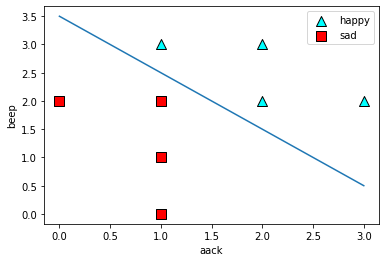

In [5]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [6]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [7]:
#weights = [1,1]
#bias = -3.5
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(prediction(weights, bias, features[i])
          , error(weights, bias, features[i], labels[i]))

0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0


In [8]:
# First perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    return weights, bias

In [9]:
# Shorter version of the perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [10]:
perceptron_trick(weights, bias, features[6], 0)

([0.98, 1.97], -4.02)

### Running the perceptron algorithm

#### 2) a) [1 marks] What initial weight is given to the number of ‘aacks’ and to the number of ‘beeps’? What is the initial bias?

The initial weight was 1.0 
The initial bias is 0.0

#### 2) b) [2 marks] What learning rate is used? Explain how learning rate affects the algorithm.

The learning rate used is: 0.01

#### 2) c) [1 mark] Explain what an epoch is. How many epochs are used in training?

An epoch is a single iteration through the entire dataset during the training process.

200 epochs are used in this case, even though just 150 are needed to get the minimum error


#### 2) d) [1 mark] After training, what values are assigned to the ‘aacks’ weight, ‘beeps’ weight and the bias?

After training the values for 

a'= 0.6299999999999997 (aacks weight), 

b' = 0.17999999999999938 (beeps weight), and 

c' = 1.04 (bias) 

#### 2) e) [1 mark] What percentage of points have the correct prediction?

The prediction was 100% acurrate, 4 sad points were founded sad and 4 happy points were founded happy

#### 2) f) [2 marks] From the plot of error vs. epoch, could less epochs have been used to achieve similar performance? Would more training have made a significant improvement?

Yes, according to the diagram the ninimum error is reached around 145  epochs, so 150 epochs could be good enough.

Training is good enough when we get the ninimum error more than that is a resources waste, is not an improvement, so more training wont make a difference. 

#### 2) g) [2 marks] Explain the meaning of stochastic, mini-batch and batch gradient descent

Gradient descent is an optimization algorithm used in machine learning to find the optimal parameters of a model by minimizing the cost function. There are three types of gradient descent techniques: stochastic gradient descent (SGD), mini-batch gradient descent, and batch gradient descent.

In stochastic gradient descent, the model updates its parameters after processing each individual training example, making it computationally efficient but less stable than the other two methods. In mini-batch gradient descent, the training dataset is divided into small batches of equal size, and the model updates its parameters after processing each batch. This approach is computationally more efficient than batch gradient descent and can converge faster than SGD. The batch gradient descent updates the parameters after processing the entire training dataset in one pass, which makes it the most stable but computationally expensive method.

The choice of which method to use depends on the size of the dataset, computational resources, and the optimization goal. Stochastic gradient descent is typically used for large datasets, where the computational cost is high, while mini-batch gradient descent is useful for balancing computational efficiency and model stability. Batch gradient descent is used for smaller datasets, where the computational cost is lower and the model's stability is crucial.

In summary, each gradient descent method has its own advantages and disadvantages, and the choice of which one to use depends on the specific needs of the problem at hand. By using the appropriate gradient descent method, we can train our model efficiently and effectively, and obtain the best possible results.

In [23]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 150):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

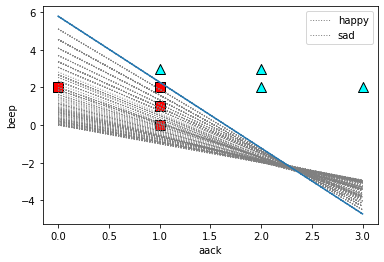

([0.6299999999999997, 0.17999999999999938], -1.0400000000000007)

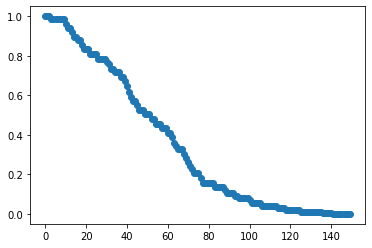

In [24]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using Turi Create

#### a) [2 marks] After training, what values are assigned to the ‘aacks’ weight, ‘beeps’ weight and the bias? Are these values different or the same as those found in the “Running the perceptron algorithm” section?


Values assigned for weights and bias are quite different as founded in "Running perceptrone algorithm", as follows: 

a' = 2.972553703911967 
b' = 2.498635186535742
c' = -8.959708265685022

Running perceptrone algorithm:
a'= 0.6299999999999997 (aacks weight), 
b' = 0.17999999999999938 (beeps weight), and 
c' = 1.04 (bias) 

#### b) [1 mark] What percentage of points have the correct prediction? How does this compare with the results of the “Running the perceptron algorithm” section?


The prediccion is 100% acurrate, 4 sad points were correctly predicted and 4 happy points were correctly predicted

#### c) [1 mark] Is there only a single choice of weights and bias that gets the predictions correct, or are there other choices of weights and bias that would achieve the same accuracy? Explain.

In [13]:
!pip install utils

In [14]:
import turicreate as tc

In [15]:
datadict = {'aack': features[:,0], 'beep':features[:,1], 'prediction': labels}
data = tc.SFrame(datadict)
data

aack,beep,prediction
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
2,3,1
3,2,1


In [16]:
perceptron = tc.logistic_classifier.create(data, target='prediction')

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 1.002739     | 1.000000          |

| 2         | 3        | 1.004734     | 1.000000          |

| 3         | 4        | 1.005988     | 1.000000          |

| 4         | 5        | 1.010652     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [17]:
perceptron.coefficients

name,index,class,value,stderr
(intercept),None,1,-8.959708265685022,6.844844514902377
aack,None,1,2.972553703911967,2.6977310191336046
beep,None,1,2.498635186535742,2.4552961030591502


In [31]:
a_prima = perceptron.coefficients['value'][1]
a_prima


2.972553703911967

In [32]:
b_prima = perceptron.coefficients['value'][2]
b_prima


2.498635186535742

In [33]:
c_prima = perceptron.coefficients['value'][0]
c_prima

-8.959708265685022

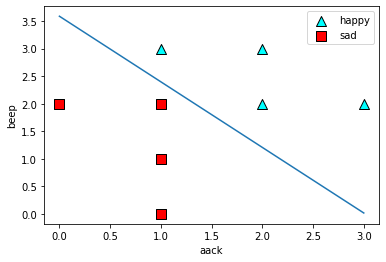

In [34]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
utils.draw_line(a_prima, b_prima, c_prima)